In [1]:
from google.colab import drive
drive.mount('/content/drive')#, force_remount=True)

Mounted at /content/drive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
import findspark 
findspark.init() 
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Теперь Colab готов запускать PySpark.

In [ ]:
# Загрузка данных в Spark DataFrame
df = spark.read.load("./drive/MyDrive/Colab Notebooks/data/Павел Беликов - daily_weather.csv - Павел Беликов - daily_weather.csv.csv", 
                      format='com.databricks.spark.csv', 
                      header='true',inferSchema='true') 

In [ ]:
df.show()

+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|number| air_pressure_9am|      air_temp_9am|avg_wind_direction_9am|avg_wind_speed_9am|max_wind_direction_9am|max_wind_speed_9am|rain_accumulation_9am|rain_duration_9am|relative_humidity_9am|relative_humidity_3pm|
+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|     0|918.0600000000087| 74.82200000000041|                 271.1| 2.080354199999768|    295.39999999999986| 2.863283199999908|                  0.0|              0.0|    42.42000000000046|   36.160000000000494|
|     1|917.3476881177097| 71.40384263106537|    101.93517935618371|2.4430092157340217|    140.47154847112498|3.5333236016106238|               

In [ ]:
df.columns # просмотреть столбцы

['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In [ ]:
df.printSchema() # вывод типов данных столбцов

root
 |-- number: integer (nullable = true)
 |-- air_pressure_9am: double (nullable = true)
 |-- air_temp_9am: double (nullable = true)
 |-- avg_wind_direction_9am: double (nullable = true)
 |-- avg_wind_speed_9am: double (nullable = true)
 |-- max_wind_direction_9am: double (nullable = true)
 |-- max_wind_speed_9am: double (nullable = true)
 |-- rain_accumulation_9am: double (nullable = true)
 |-- rain_duration_9am: double (nullable = true)
 |-- relative_humidity_9am: double (nullable = true)
 |-- relative_humidity_3pm: double (nullable = true)



In [ ]:
df.describe().toPandas().transpose() # сводная статистика по датафрейму

,0,1,2,3,4
summary,count,mean,stddev,min,max
number,1095,547.0,316.24357700987383,0,1094
air_pressure_9am,1092,918.8825513138094,3.184161180386833,907.9900000000024,929.3200000000012
air_temp_9am,1090,64.93300141287072,11.175514003175877,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1091,142.2355107005759,69.13785928889189,15.500000000000046,343.4
avg_wind_speed_9am,1092,5.50828424225493,4.5528134655317185,0.69345139999974,23.554978199999763
max_wind_direction_9am,1092,148.95351796516923,67.23801294602953,28.89999999999991,312.19999999999993
max_wind_speed_9am,1091,7.019513529175272,5.598209170780958,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1089,0.20307895225211126,1.5939521253574893,0.0,24.01999999999907
rain_duration_9am,1092,294.1080522756142,1598.0787786601481,0.0,17704.0


In [ ]:
df.describe(['air_temp_9am']).show() # сводная статистика по отдельному столбцу

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+



In [ ]:
len(df.columns) # количество столбцов 

11

In [ ]:
df.count() # количество строк

1095

In [ ]:
# удалим строки с пропущенными значениями в столбце air_pressure_9am
df2=df.na.drop(subset=['air_temp_9am'])

In [ ]:
df2.count()

1090

In [ ]:
from pyspark.sql.functions import avg
imputeDF = df

In [ ]:
for x in imputeDF.columns:
    meanValue = df2.agg(avg(x)).first()[0]
    print(x, meanValue)
    imputeDF = imputeDF.na.fill(meanValue, [x])

number 546.8256880733945
air_pressure_9am 918.8833281182478
air_temp_9am 64.93300141287072
avg_wind_direction_9am 142.19559679647966
avg_wind_speed_9am 5.516615074808091
max_wind_direction_9am 148.87405226312185
max_wind_speed_9am 7.030251646918073
rain_accumulation_9am 0.20401566328648446
rain_duration_9am 295.460895202365
relative_humidity_9am 34.286931549494355
relative_humidity_3pm 35.37023074361628


In [ ]:
df.describe(['air_temp_9am']).show()
imputeDF.describe(['air_temp_9am']).show()

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1095|
|   mean| 64.93300141287071|
| stddev|11.149946561759078|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+



Попробуйте заменить пропущенные значения на медиану и на техническую категорию (константу). Постройте распределенние для переменной (гистограмму) и сделайте вывод, какой из методов заполнения в данном случае лучше.

Оба варианта заполнения не имеют больших различий в данном случае.

Средние значения по столбцам примерно одинаковы, что можно увидет на диаграмме ниже (синий столбец лишний).

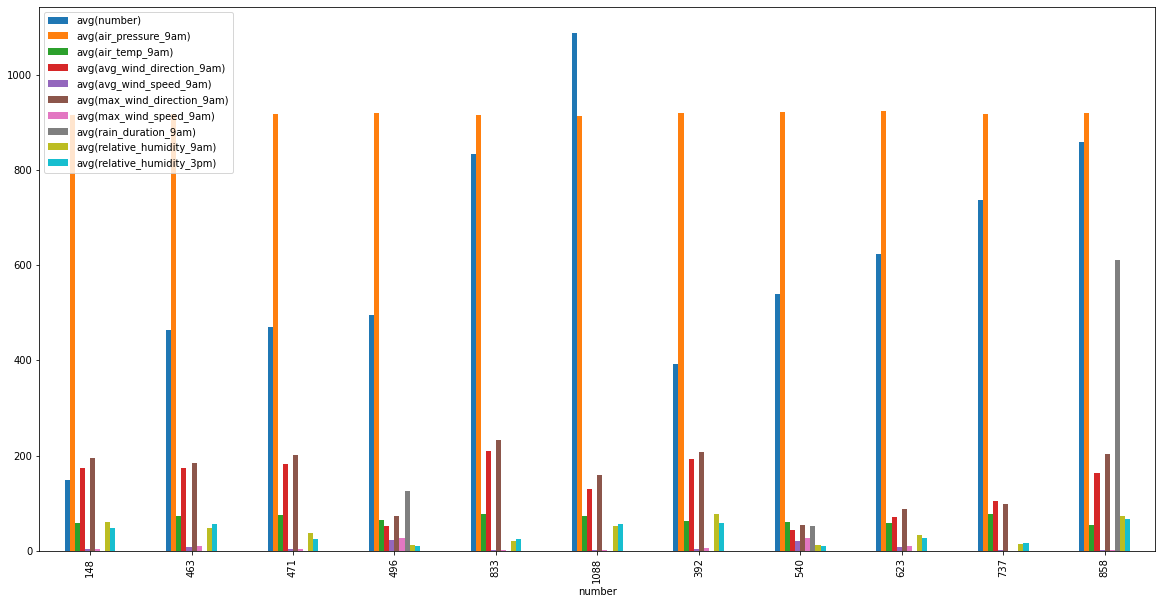

In [ ]:
from matplotlib import pyplot as plt

sec_df =  df.select([ 'number',
                      'air_pressure_9am',
                      'air_temp_9am',
                      'avg_wind_direction_9am',
                      'avg_wind_speed_9am',
                      'max_wind_direction_9am',
                      'max_wind_speed_9am',
                      'rain_duration_9am',
                      'relative_humidity_9am',
                      'relative_humidity_3pm']
                     )\
                     .groupBy('number')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

sec_df.iloc[ind ,:].plot(kind='bar', x='number', y=sec_df.columns.tolist()[1:], figsize=(20, 10))
plt.show()

In [ ]:
df2.stat.corr("rain_accumulation_9am", "rain_duration_9am")

0.7337737589869374

**Обработка категориальных признаков.**<br/>
Данные для обработки и их описание можно скачать по ссылке: https://www.kaggle.com/c/ieee-fraud-detection



In [2]:
# Label encoding - замена текстового представления признака на числовое

# One-hot encoding
import pandas as pd

data = pd.read_csv("./drive/MyDrive/Colab Notebooks/data/train_transaction.csv")

In [ ]:
data.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# категориальные признаки
categorical = ["ProductCD", "card1", "card2","card3", "card4", "card5", "card6", "addr1", "addr2",
               "P_emaildomain", "R_emaildomain", "M1", "M2","M3","M4","M5","M6","M7", "M8","M9", ]
#for d in data.columns:
#  print(d, pd.unique(data[d]))

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in categorical:
    data[column_name]=le.fit_transform(data[column_name])

In [ ]:
data.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,4,10095,500,42,1,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,4,1372,303,42,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,4,2833,389,42,3,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,4,13341,466,42,2,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,1,2712,413,42,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler
df_std = pd.DataFrame(std_scaler.fit_transform(data), columns=data.columns)

In [ ]:
df_std.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,-1.732048,-0.190417,-1.577987,-0.278167,0.547250,0.827705,1.474598,-0.283337,-2.739072,-1.352159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.732042,-0.190417,-1.577986,-0.443327,0.547250,-1.454646,0.237476,-0.283337,-1.045595,-2.377698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.732036,-0.190417,-1.577972,-0.317889,0.547250,-1.072379,0.777539,-0.283337,0.647882,-0.782415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.732030,-0.190417,-1.577965,-0.355521,0.547250,1.677012,1.261084,-0.283337,-1.045595,-2.035852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.732024,-0.190417,-1.577964,-0.355521,-1.559603,-1.104038,0.928255,-0.283337,-1.045595,-2.377698,...,-0.164104,-0.116088,-0.123176,-0.127534,-0.040216,-0.152633,-0.103909,-0.082803,-0.138043,-0.123568


In [ ]:
data.columns[:100]

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37',
       'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45'],
      dtype='object')

Выбросов нет.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6e8f288090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6e8f42d550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6e8f1bc090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6e8f513d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6e8f5132d0>],
 'means': []}

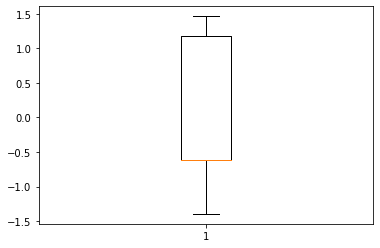

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(x=df_std['P_emaildomain'])

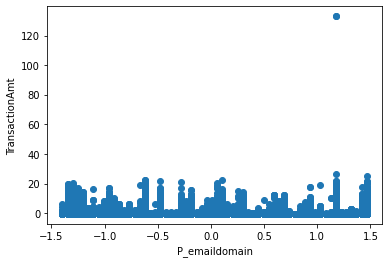

In [ ]:
plt.xlabel("P_emaildomain")
plt.ylabel("TransactionAmt")
plt.scatter(x=df_std['P_emaildomain'], y=df_std["TransactionAmt"])

Показатель количества транзакций на email доменах после z нормализации данных.\

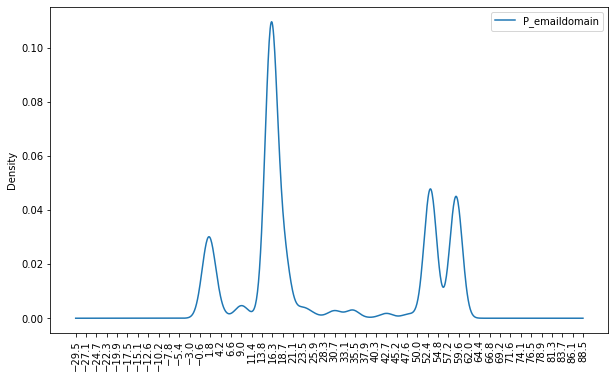

In [ ]:
import numpy as np
ax = df_std.plot(y='P_emaildomain', x='TransactionAmt', kind='kde', figsize=(10, 6))
arr = ax.get_children()[0]._x
plt.xticks(np.linspace(arr[0], arr[-1]), rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

df_norm.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,0.000000,0.0,0.000000e+00,0.002137,1.00,0.744909,1.000,0.368421,0.25,0.319328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000002,0.0,6.359409e-08,0.000900,1.00,0.101240,0.606,0.368421,0.50,0.016807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000003,0.0,4.387992e-06,0.001840,1.00,0.209047,0.778,0.368421,0.75,0.487395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000005,0.0,6.295815e-06,0.001558,1.00,0.984430,0.932,0.368421,0.50,0.117647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000007,0.0,6.740974e-06,0.001558,0.25,0.200118,0.826,0.368421,0.50,0.016807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6e8ef1cdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6e8ef1c150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6e8eed7650>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6e8ed77a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6e8ed77b90>],
 'means': []}

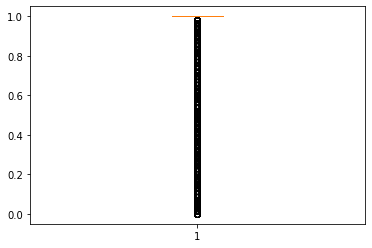

In [ ]:
plt.boxplot(x=df_norm['R_emaildomain'])

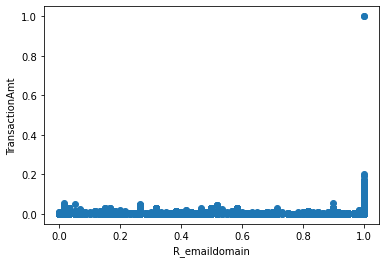

In [ ]:
plt.xlabel("R_emaildomain")
plt.ylabel("TransactionAmt")
plt.scatter(x=df_norm['R_emaildomain'], y=df_norm["TransactionAmt"])

Показатель количества транзакций на email доменах после MinMax нормализации данных.\

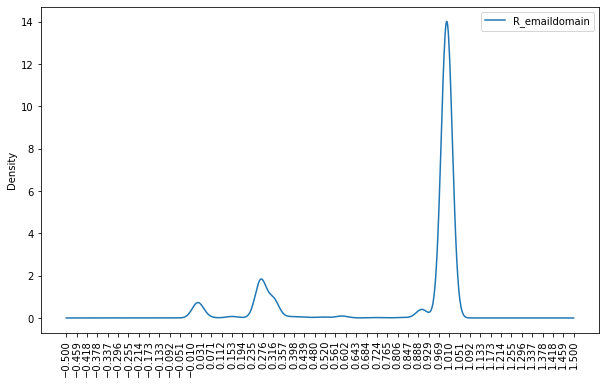

In [ ]:
import numpy as np
ax = df_norm.plot(y='R_emaildomain', x='TransactionAmt', kind='kde', figsize=(10, 6))
arr = ax.get_children()[0]._x
plt.xticks(np.linspace(arr[0], arr[-1]), rotation=90)
plt.show()

Для признаков R_emaildomain и TransactionAmt зависимости не обнаружено.

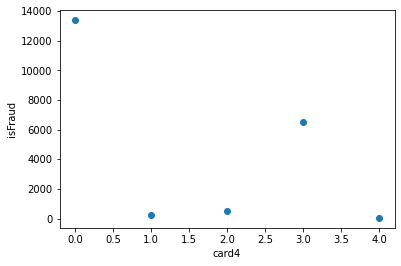

In [52]:
from matplotlib import pyplot as plt
x = pd.unique(data['card4']).tolist()
y = [0,0,0,0,0]
for i in range(590540):
  #print(data.iloc[i][8], data.iloc[i][1])
  y[int(data.iloc[i][8])] += int(data.iloc[i][1])

plt.xlabel("card4")
plt.ylabel("isFraud")
plt.scatter(x=x, y=y)

Больше всего случаев мошеничества происходило с параметром card4 равным 0.